## AI CHAT BOT

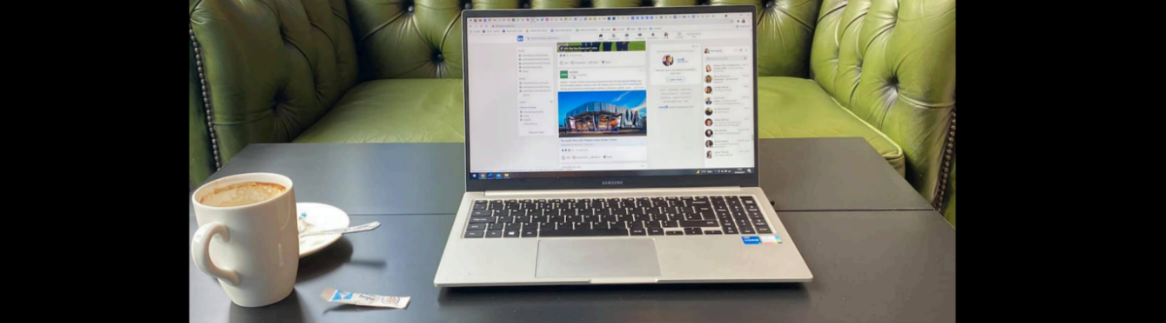

### HEMANT THAPA

In [1]:
import pyttsx3
import sounddevice as sd
import speech_recognition as sr
import os
import openai
from openai import OpenAI

In [2]:
engine = pyttsx3.init()
print(engine)

### 1. RATE

In [3]:
rate = engine.setProperty('rate' , 150)

### 2. VOLUME 

In [4]:
volume = engine.setProperty('volume', 1)

In [5]:
text = "Thank you for watching my video"

In [6]:
engine.say(text)

### 3. SAVE FILE

In [7]:
engine.save_to_file(text, 'hello.mp3')
engine.runAndWait()
engine.stop()

In [8]:
rate_set = engine.getProperty('rate')
volume_set = engine.getProperty('volume')

In [9]:
print(f" Rate of speech {rate_set}, volume is set to {volume_set}")

 Rate of speech 150, volume is set to 1.0


### 4. RECORD AUDIO

In [10]:
def record_audio(duration = 5):
    audio_data = sd.rec(int(duration * 44100), samplerate= 44100, channels = 1)
    sd.wait()
    return audio_data, 44100

### 5. PLAY AUDIO

In [11]:
def play_audio(audio_data, sample_rate):
    print("Playing Audio")
    sd.play(audio_data, sample_rate)
    sd.wait()
    print("Finish Playing Audio")

In [12]:
audio_data, sample_rate = record_audio(duration=10)

In [13]:
play_audio(audio_data, sample_rate)

Playing Audio
Finish Playing Audio


### 6. SUBTITLE FROM SPEECH

In [14]:
def record():
    recognizer = sr.Recognizer()
    
    with sr.Microphone() as source:
        print("Listening for voice as an input....")
        
        try:
            audio = recognizer.listen(source, timeout=10)
            print("Audio has been recevied")
            
            text = recognizer.recognize_google(audio)
            print("Recognized Text: " + text)
        
        except sr.WaitTimeoutError:
            print("No speech input has been detected")

In [15]:
record()
print(text)

Listening for voice as an input....
Audio has been recevied
Recognized Text: thank you for watching my video and please don't forget to like and subscribe my channel
Thank you for watching my video


### 7. CHAT GPT API

In [16]:
def chat_gpt(prompt):
    api_key = "" #api key here
    client = OpenAI(api_key=api_key)
    chat_completion = client.chat.completions.create(
    messages = [{"role":"user",
                "content":prompt},],
        model = "gpt-3.5-turbo")
    text_to_speech = (chat_completion.choices[0].message.content)
    print(text_to_speech)

In [17]:
chat_gpt("Newton First law")

Newton's first law, also known as the law of inertia, states that an object at rest will stay at rest and an object in motion will stay in motion with a constant velocity unless acted upon by an external force. In simpler terms, an object will continue to do what it is doing (either staying still or moving in a straight line at a constant speed) unless something causes it to do otherwise. This law essentially describes the resistance of an object to changes in its motion.


### 8. FINAL PROJECT : CHAT BOT

In [18]:
def speech(text):
    engine = pyttsx3.init()
    rate = engine.setProperty('rate' , 150)
    volume = engine.setProperty('volume', 1)
    engine.say(text)
    engine.save_to_file(text, 'hello.mp3')
    engine.runAndWait()
    engine.stop()
    
recognizer = sr.Recognizer()

with sr.Microphone() as source:
    print("Listening for voice as an input....")

    try:
        audio = recognizer.listen(source, timeout=10)
        print("Audio has been recevied")

        text_recognised = recognizer.recognize_google(audio)
        print("Recognized Text: " + text_recognised)

    except sr.WaitTimeoutError:
        print("No speech input has been detected")
        
def chat_gpt(text_recognised):
    api_key = " " #api key here
    client = OpenAI(api_key=api_key)
    chat_completion = client.chat.completions.create(
    messages = [{"role":"user",
                "content":text_recognised},],
        model = "gpt-3.5-turbo")
    text_to_speech = (chat_completion.choices[0].message.content)
    print(text_to_speech)
    return speech(text_to_speech)
chat_gpt(text_recognised)

Listening for voice as an input....
Audio has been recevied
Recognized Text: please give me a diet plan for gym and of course a weekly balance chart how much calories should I burn and how much food I shouldn't take
It is important to note that creating a personalized diet plan that includes specific calorie intake and exercise recommendations should be done by a registered dietitian or a nutritionist who can account for your individual needs and goals. Nevertheless, I can provide you with some general guidelines to help you get started. Keep in mind that these are just general recommendations, and individual needs can vary:

1. Determine your calorie intake:
- Determine your basal metabolic rate (BMR): This is the number of calories your body needs at rest. Many online BMR calculators can help you with this estimation.
- Add calories based on activity level: Calculate the number of calories burned during exercise and add them to your BMR. This varies depending on the intensity and dur